<a href="https://colab.research.google.com/github/pyc970905/pythonBigData/blob/main/%EB%B9%84%ED%8A%B8_2205_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EB%94%A5%EB%9F%AC%EB%8B%9D_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 로지스틱 회귀

In [5]:
import pandas as pd
fish = pd.read_csv('/content/Fish.csv')
fish

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [42]:
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [43]:
print(fish['Species'].unique())

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [44]:
fish_input = fish[['Weight','Length2','Length3','Height','Width']]
print(fish_input[:5])

   Weight  Length2  Length3   Height   Width
0   242.0     25.4     30.0  11.5200  4.0200
1   290.0     26.3     31.2  12.4800  4.3056
2   340.0     26.5     31.1  12.3778  4.6961
3   363.0     29.0     33.5  12.7300  4.4555
4   430.0     29.0     34.0  12.4440  5.1340


In [45]:
fish_target = fish['Species'].to_numpy()
print(fish_target[:5])

['Bream' 'Bream' 'Bream' 'Bream' 'Bream']


In [46]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input,fish_target)

In [47]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [48]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.75


In [49]:
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [50]:
kn.predict(test_scaled[:5])

array(['Smelt', 'Bream', 'Bream', 'Bream', 'Bream'], dtype=object)

In [51]:
print(test_target[:5])

['Perch' 'Bream' 'Bream' 'Bream' 'Bream']


In [52]:
import numpy as np
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba,decimals=4)) #각n번째 요소마다 종에 관한 확률

[[0.     0.     0.3333 0.     0.     0.6667 0.    ]
 [1.     0.     0.     0.     0.     0.     0.    ]
 [1.     0.     0.     0.     0.     0.     0.    ]
 [1.     0.     0.     0.     0.     0.     0.    ]
 [1.     0.     0.     0.     0.     0.     0.    ]]


In [53]:
print(test_scaled[3])
print(test_scaled[3:4]) # 차이점 확인

[1.28176562 0.692791   0.88848784 1.98348782 1.07555544]
[[1.28176562 0.692791   0.88848784 1.98348782 1.07555544]]


In [54]:
_, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['Bream' 'Bream' 'Bream']]


In [55]:
import math
def sigmoid(x):
  return 1/(1+math.exp(-x))

In [56]:
xs = [x for x in np.arange(-100,100,0.1)]

In [57]:
ys = [sigmoid(x) for x in xs]

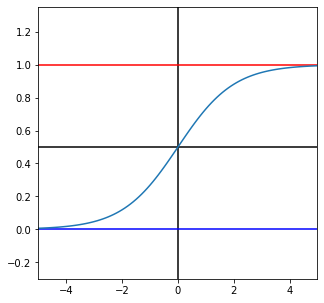

In [98]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.plot(xs,ys)
plt.ylim(-0.3,1.35)
plt.xlim(-5,5)
plt.vlines(0,-2,2)
plt.hlines(0,-100,100,colors='b')
plt.hlines(0.5,-100,100)
plt.hlines(1,-100,100,colors='r')
plt.show()

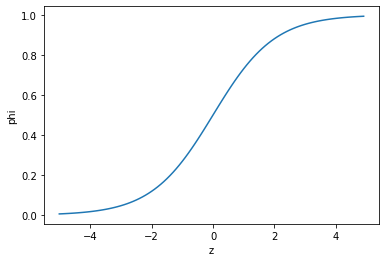

In [93]:
z = np.arange(-5,5,0.1)
phi = 1 / (1 + np.exp(-z))
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

In [64]:
bream_smelt_indexes = (train_target == 'Bream')|(train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]
bream_smelt_indexes2 = (test_target == 'Bream')|(test_target == 'Smelt')
test_bream_smelt = test_scaled[bream_smelt_indexes2]
test_target_bream_smelt = test_target[bream_smelt_indexes2] # 7종으로 있었던거를 이항분류로 위해서 두개로 바꿈

In [65]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt) 

LogisticRegression()

In [66]:
lr.predict(test_bream_smelt)

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Smelt',
       'Bream', 'Bream', 'Smelt', 'Bream', 'Bream', 'Bream', 'Bream'],
      dtype=object)

In [67]:
print(test_target_bream_smelt)

['Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Smelt' 'Bream' 'Bream'
 'Smelt' 'Bream' 'Bream' 'Bream' 'Bream']


In [68]:
print(lr.classes_)

['Bream' 'Smelt']


In [69]:
print(lr.coef_,lr.intercept_) # 선형회귀에 의해 만들어진 가중치와 편향

[[-0.41102916 -0.59806063 -0.68545191 -1.05224499 -0.78668777]] [-2.06942169]


In [70]:
decisions = lr.decision_function(test_bream_smelt[:5])
print(decisions) # 선형회귀값에 의한 예측 값

[-4.82788144 -7.29491998 -6.55285287 -5.32649012 -5.08919248]


In [71]:
for d in decisions:
  print("%0.2f"%sigmoid(d),end=' ') # sigmoid(로지스틱)함수에 의해 확률값이 바뀐 결과

0.01 0.00 0.00 0.00 0.01 

In [72]:
res = lr.predict(test_bream_smelt[:5])
print(res) # 결론

['Bream' 'Bream' 'Bream' 'Bream' 'Bream']


#로지스틱 회귀를 이용한 다중 분류

In [81]:
lr = LogisticRegression()
lr.fit(train_scaled,train_target)
print(lr.score(train_scaled,train_target))
print(lr.score(test_scaled,test_target))

0.8487394957983193
0.725


In [82]:
lr = LogisticRegression(C=20,max_iter=1000)
lr.fit(train_scaled,train_target)
print(lr.score(train_scaled,train_target))
print(lr.score(test_scaled,test_target))

0.9327731092436975
0.85


In [83]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Bream' 'Bream' 'Bream' 'Bream']


In [84]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.049 0.515 0.    0.039 0.395 0.003]
 [0.993 0.003 0.    0.    0.    0.    0.004]
 [0.999 0.    0.    0.    0.    0.    0.001]
 [0.996 0.    0.    0.    0.    0.    0.004]
 [0.998 0.001 0.    0.    0.    0.    0.001]]


In [85]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [86]:
print(lr.coef_)

[[-1.5932331  -0.94848126  2.11001188  7.37274962 -0.576955  ]
 [-0.39356738 -2.09498166 -3.174494    5.97147417 -2.16882794]
 [ 3.19450787  6.04782416 -8.74127329 -5.68224623  4.73714229]
 [-0.15418035  3.51733808  3.86672702 -3.45313104 -1.49253839]
 [-3.00545576 -5.53857857  4.65113887 -1.26533989  3.87893528]
 [-0.98213685  0.76543365  1.24169199 -3.82836413 -5.1058367 ]
 [ 2.93406557 -1.7485544   0.04619753  0.88485751  0.72808046]]


In [87]:
print(lr.intercept_)

[-0.36305413 -0.90882834  3.20683401 -0.08510799  1.8832075  -5.78929642
  2.05624537]


시그모이드, 로지스틱회귀 = 이진분류 ,,,,,,,,, 소프트맥스 = 시그모이드,로지스틱을 활용한 다중 분류

In [99]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2)) ### 시그모이드 함수에 넣을 z값들

[[-8.840e+00  2.230e+00  4.590e+00 -3.590e+00  2.000e+00  4.320e+00
  -7.000e-01]
 [ 1.038e+01  4.550e+00 -3.820e+00 -2.960e+00  6.100e-01 -1.368e+01
   4.910e+00]
 [ 1.466e+01  4.200e+00 -3.300e+00 -2.410e+00 -1.360e+00 -1.975e+01
   7.950e+00]
 [ 1.282e+01  3.830e+00 -2.450e+00 -2.860e+00 -1.000e-02 -1.850e+01
   7.180e+00]
 [ 1.150e+01  4.070e+00 -4.590e+00 -1.920e+00  2.500e-01 -1.416e+01
   4.850e+00]]


In [100]:
from scipy.special import softmax
proba = softmax(decision, axis= 1)
print(np.round(proba, decimals=3))

[[0.    0.049 0.515 0.    0.039 0.395 0.003]
 [0.993 0.003 0.    0.    0.    0.    0.004]
 [0.999 0.    0.    0.    0.    0.    0.001]
 [0.996 0.    0.    0.    0.    0.    0.004]
 [0.998 0.001 0.    0.    0.    0.    0.001]]


mse 에서만 경사하강법이 유효하다.

# 확률적 경사 하강법 모델

In [101]:
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier()
sc.fit(train_scaled,train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.8403361344537815
0.75


In [136]:
sc = SGDClassifier(loss='log',max_iter=100,random_state=42)
sc.fit(train_scaled,train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.9495798319327731
0.85


In [125]:
sc.partial_fit(train_scaled,train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.8823529411764706
0.75


In [153]:
import numpy as np
sc = SGDClassifier(loss='log',random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)

In [154]:
for _ in range(0,300):
  sc.partial_fit(train_scaled, train_target, classes= classes)
  train_score.append(sc.score(train_scaled,train_target))
  test_score.append(sc.score(test_scaled,test_target))

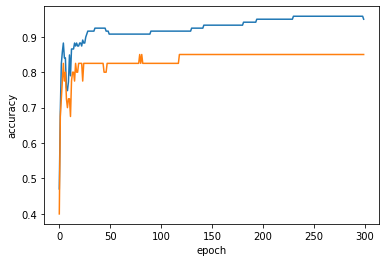

In [155]:
plt.plot(train_score,label='train')
plt.plot(test_score,label ='test')
plt.legend
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [162]:
wine = pd.read_csv('/content/wine2.csv')

In [163]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [164]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [165]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [167]:
wine['class'].unique()

array([0., 1.])

In [169]:
data = wine[['alcohol','sugar','pH']].to_numpy()
target = wine['class'].to_numpy()
data.shape, target.shape

((6497, 3), (6497,))

In [171]:
train_input, test_input, train_target, test_target = train_test_split(data,target,test_size=0.2) 
train_input.shape, test_input.shape

((5197, 3), (1300, 3))

In [176]:
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [173]:
# train_scaled = train_input
# test_scaled = test_input

In [177]:
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7833365403117183
0.78


In [178]:
print(lr.coef_,lr.intercept_)

[[ 0.55628886  1.64944526 -0.72571061]] [1.77896009]


In [190]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8474119684433327
0.8461538461538461


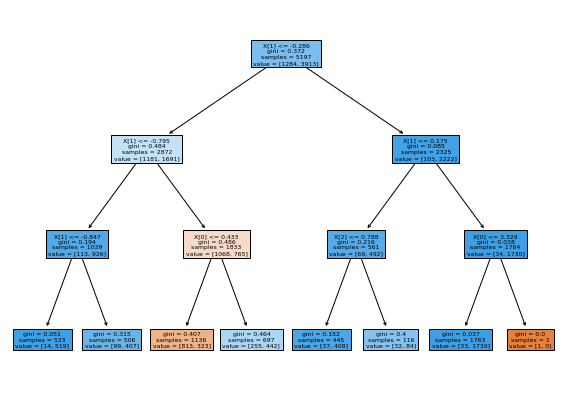

In [192]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt,filled=True)
plt.show()

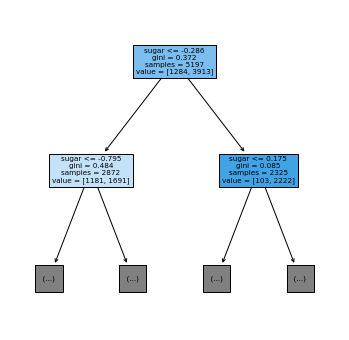

In [194]:
plt.figure(figsize=(6,6))
plot_tree(dt,max_depth=1,filled=True,feature_names=['alcohol','sugar','pH'])
plt.show()

In [195]:
print(dt.feature_importances_)

[0.13759716 0.85366633 0.00873651]


In [196]:
sub_input , val_input, sub_target, val_target = train_test_split(train_input, train_target)

In [197]:
dt = DecisionTreeClassifier(max_depth=4)
dt.fit(sub_input,sub_target)
print(dt.score(sub_input,sub_target))
print(dt.score(val_input, val_target))
print(dt.score(test_input, test_target))

0.8542468565563254
0.8746153846153846
0.8584615384615385


In [205]:
from sklearn.model_selection import GridSearchCV
params = {'min_impurity_decrease':[0.0001,0.001,0.01,0.1,0.2]}   


gs = GridSearchCV(DecisionTreeClassifier(),params )
gs.fit(train_input , train_target)
dt = gs.best_estimator_
print(dt.score(train_input , train_target))
print(dt.score(test_input , test_target))

0.9617086780835097
0.8753846153846154


In [206]:
print(gs.best_params_)
print(gs.cv_results_['mean_test_score'])

{'min_impurity_decrease': 0.0001}
[0.87415581 0.86761494 0.85222366 0.7529344  0.7529344 ]


In [209]:
params = { 'min_impurity_decrease':[0.0001,0.001,0.01,0.1,0.2],'max_depth':range(5,20),'min_samples_split':range(2,100,10)}

In [210]:
gs = GridSearchCV(DecisionTreeClassifier(),params )
gs.fit(train_input , train_target)
dt = gs.best_estimator_
print(dt.score(train_input , train_target))
print(dt.score(test_input , test_target))

0.9565133730998653
0.8730769230769231


In [211]:
print(gs.best_params_)

{'max_depth': 15, 'min_impurity_decrease': 0.0001, 'min_samples_split': 2}


#하이퍼파라미터

#앙상블


In [214]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
rf = RandomForestClassifier()
scores = cross_validate(rf,train_input, train_target, return_train_score=True)
print(scores)

{'fit_time': array([0.6421566 , 0.6318891 , 0.59974766, 0.6369226 , 0.59272981]), 'score_time': array([0.05920434, 0.04889798, 0.04803252, 0.04718399, 0.05177021]), 'test_score': array([0.90288462, 0.9       , 0.89701636, 0.87872955, 0.89220404]), 'train_score': array([0.99759442, 0.99735386, 0.996152  , 0.997595  , 0.996633  ])}


In [215]:
print(np.mean(scores['train_score']),np.mean(scores['test_score']))

0.9970656540779226 0.894166913452284


In [217]:
rf.fit(train_input,train_target)
print(rf.feature_importances_)

[0.23208136 0.49728146 0.27063718]


#